# Field inference

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc
import seaborn as sns

In [ ]:
from scipy.signal import argrelextrema

In [2]:
sns.set_theme(context='paper', font= 'Serif', style = 'ticks')

In [3]:
a = 9.5
g = 6.3
d = 0.1
alpha = 20

time_step = 0.01
total_time = 2

time_arr = np.arange(0,total_time,time_step)

In [4]:
a_bar = a/(2*np.pi)
g_bar = g/(2*np.pi)

In [5]:
# epsilon = 0.00
e_0 = a_bar/(1 + g_bar)

initial_e = e_0 + 0.01
epsilon = initial_e - e_0

field_list = []
# field_list.append(initial_e)

exp_term = np.zeros_like(time_arr)
gamma_term = np.zeros_like(time_arr)

reset_time = 0 #last moment when e touched the ground

for ind,t in enumerate(time_arr):
    value = 0
    n = np.floor(t/d)
    n_floor = t/d - np.floor(t/d)
    
    exp_term[ind] = e_0 + (-g_bar)**(n) *  epsilon
    gamma_term[ind] = (-g_bar)**(n) * (-epsilon) *(1 + g_bar) * gammainc(2*n,alpha*d*n_floor)
    
    value =  exp_term[ind] + gamma_term[ind]    
    
    field_list.append(value)

field_arr = np.array(field_list)

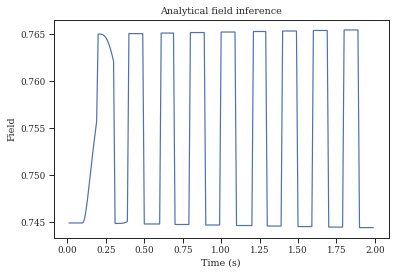

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Analytical field inference')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Field')

ax.plot(time_arr, field_arr)

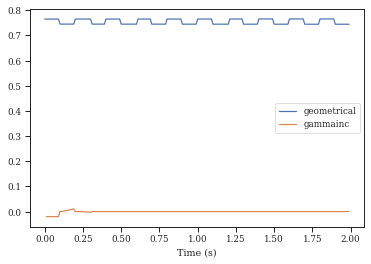

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_xlabel('Time (s)')
# ax.set_ylabel('Field')

# ax.plot(time_arr, geo_sum_term)
ax.plot(time_arr, exp_term, label = 'geometrical')
ax.plot(time_arr, gamma_term, label = 'gammainc')
plt.legend()

# Phase diagram

In [8]:
time_step = 0.01
total_time = 0.1

time_arr = np.arange(0.01,total_time,time_step)

In [9]:
g_arr = np.arange(0.1,15.1,0.5)
delay_arr = np.arange(0.1,2,0.1)
sigma_arr = np.zeros((g_arr.shape[0], delay_arr.shape[0]))
mean_arr = np.zeros((g_arr.shape[0], delay_arr.shape[0]))
check_arr = np.zeros((g_arr.shape[0], delay_arr.shape[0]), dtype = bool)

In [10]:
for i,g in enumerate(g_arr):
    for j,d in enumerate(delay_arr):
        field_list = []
        e_0 = a/(2*np.pi + g)
        g_bar = g/(2*np.pi)

        initial_e = e_0 + 0.1
        epsilon = initial_e - e_0
        
        for t in time_arr:
            value = 0
            n = np.floor(t/d) + 1
            n_floor = t/d - np.floor(t/d)
            
            g_bar = g/(2*np.pi)
            exp_term[ind] = e_0 + (-g_bar)**(n) *  epsilon
            gamma_term[ind] = (-g_bar)**(n) * (-epsilon) *(1 + g_bar) * gammainc(2*n,alpha*d*n_floor)

            value =  exp_term[ind] + gamma_term[ind]    

            field_list.append(value)
        
        field_arr = np.array( field_list )
        last_ind = 100
        sigma_arr[i,j] = np.std(field_list[-last_ind:])
        mean_arr[i,j] = np.mean(field_list[-last_ind:])
        if True in field_arr> initial_e: check_arr[i,j] = True



<AxesSubplot:>

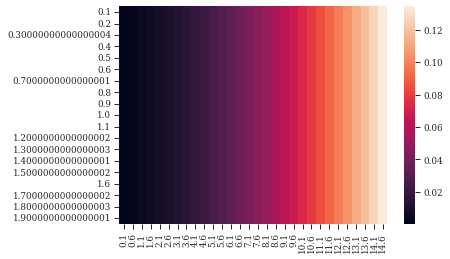

In [11]:
sns.heatmap((sigma_arr.T), xticklabels=g_arr, yticklabels=delay_arr)

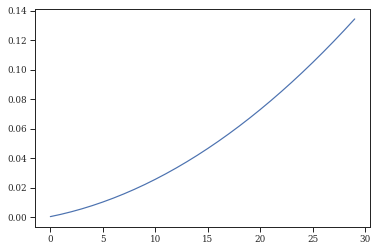

In [12]:
plt.plot( sigma_arr.T[0] )

<AxesSubplot:>

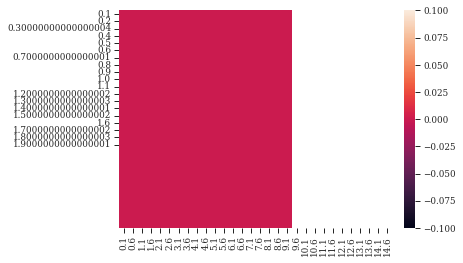

In [13]:
sns.heatmap(check_arr*1, xticklabels=g_arr, yticklabels=delay_arr)